NBA Stats to Salary

Team Wizards

Trent Thompson (trentthompson)
Alexander Peal (alexanderpeal)
Dylan Grim (dylang04)
Pranav Ramasubbiah Rajavel (pranavrajavel)Levi Bowman(levib)

Our project will compare the salary of various NBA player throughout the organization and compare their salary to their stats. This way you can find the amount of points per dollar they are paid and the same with reboundss assists steals and blocks. There can also be a formula made weighing values of each stat to find the best contracts in the league and maybe seeing what team has the best contracts and comparing that to whether they are good or not. 

Who has the most value players?
Who is the highest value player in the league?
What is the weight of each stat? One point should not equal one block.

The website we will use for the stats of the players is: https://www.basketball-reference.com/ They have all the stats and salaries of the players in the league. 

**Merging, and cleaning the Baskeball Data**

In [3]:
import pandas as pd

stats = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2025_per_game.html")[0]
#pulling both stats and salary from bball ref
salary = pd.read_html("https://www.basketball-reference.com/contracts/players.html", header=[0,1])[0]
#flatten column names dropping unnamed filler labels
salary.columns = ['_'.join([str(c) for c in col if c and c != 'Unnamed']) for col in salary.columns]
#remove repeated headers rows that appear in table body. rename tm to team.
stats = stats[~stats['Player'].str.contains('Player', na=False)]
stats = stats.rename(columns={'Tm':'Team'})
#flatten contracts to simple names
salary = salary.rename(columns={'Unnamed: 1_level_0_Player':'Player', 'Unnamed: 2_level_0_Tm':'Team', 'Salary_2025-26':'Salary'})
salary = salary[['Player','Team','Salary']].copy()
# clean and merge
salary['Salary'] = (
    salary['Salary']
      .replace('[\$,]', '', regex=True)   # remove $ and commas                      # convert to numeric
)
#inner join by keeping player that only appear in both game stats and salary
merged = pd.merge(stats, salary[['Player','Salary']], on='Player', how='inner')
merged['Salary'] = merged['Salary'].astype('int')

merged = merged.sort_values(by=['Team'])
#dropping dups if they exist
merged = merged.drop_duplicates(subset=['Player', 'Age'], keep='first').reset_index(drop=True)
merged = merged.sort_values(by=['Rk'])

<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
C:\Users\trent\AppData\Local\Temp\ipykernel_9020\368561766.py:17: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)   # remove $ and commas                      # convert to numeric


**Summary Statistics**

In [5]:
merged.describe(include = 'all')

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Salary
count,398.000000,398,398.000000,398,398,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,51,3.980000e+02
unique,NaN,398,NaN,32,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,NaN
top,NaN,Shai Gilgeous-Alexander,NaN,2TM,SG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,NaN
freq,NaN,1,NaN,45,104,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
mean,227.060302,NaN,25.927136,NaN,NaN,55.972362,29.582915,22.812563,4.000000,8.549749,...,3.164573,4.234673,2.507286,0.786935,0.480905,1.306281,1.779648,10.930402,NaN,1.376147e+07
std,146.680212,NaN,4.370409,NaN,NaN,19.381799,27.146991,8.509209,2.353795,4.912333,...,1.827395,2.445147,1.890137,0.403174,0.437577,0.846677,0.667876,6.601057,NaN,1.447359e+07
min,1.000000,NaN,19.000000,NaN,NaN,1.000000,0.000000,2.500000,0.300000,1.100000,...,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,NaN,7.073200e+04
25%,101.250000,NaN,23.000000,NaN,NaN,44.250000,4.000000,16.400000,2.300000,4.800000,...,1.900000,2.600000,1.125000,0.500000,0.200000,0.700000,1.300000,6.000000,NaN,2.679090e+06
50%,208.500000,NaN,25.000000,NaN,NaN,60.000000,21.500000,23.750000,3.400000,7.600000,...,2.800000,3.700000,1.950000,0.750000,0.400000,1.100000,1.800000,9.400000,NaN,7.985140e+06
75%,344.750000,NaN,29.000000,NaN,NaN,72.000000,54.000000,30.000000,5.400000,11.700000,...,4.000000,5.475000,3.400000,1.000000,0.600000,1.700000,2.300000,14.575000,NaN,1.871969e+07


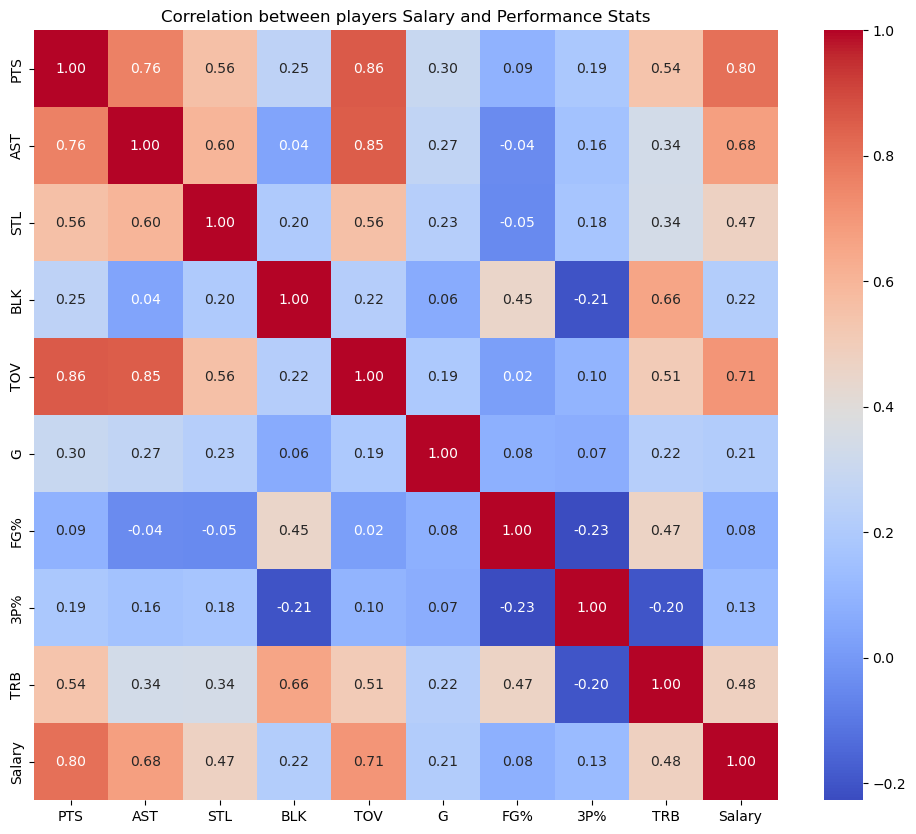

In [7]:
import seaborn as sns, matplotlib.pyplot as plt
#correlation matrix. choosing columns
cols = ['PTS', 'AST', 'STL', 'BLK', 'TOV', 'G', 'FG%', '3P%', 'TRB', 'Salary']
corr = merged[cols].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt= '.2f')
plt.title("Correlation between players Salary and Performance Stats")
plt.show()

From the heatmap you can see that a players points has the highest correlation to the amount of money which they are being paid with assists coming in second. Both of these obervations are faily obvious and you wouldn't have to look at the data to make this kind of prediction. What I found to be very suprising is that 3-Point percentage and overall field goal percentage have a very low correlation to the amount of money a player is making. This is most likely due to the fact that we are including all players in our data which means some players who don't play very much could have inflated field goal and 3-point percentages leading to the low correlation. 

**Scatter Plots to see the relationship between specific statistics and overall salary**

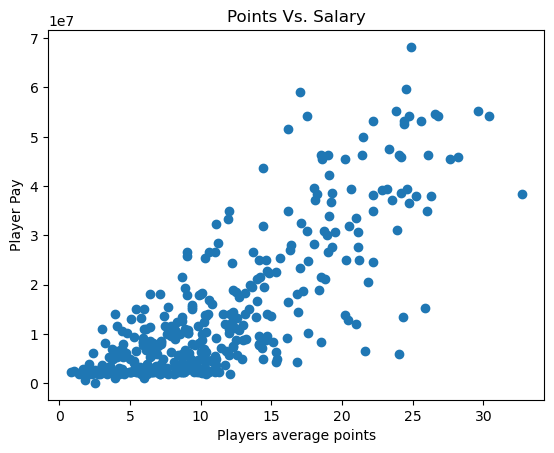

In [79]:
#scatterplot of points vs salary
plt.scatter(x = 'PTS', y = 'Salary', data = merged)
plt.xlabel("Players average points")
plt.ylabel("Player Pay")
plt.title("Points Vs. Salary")
plt.show()

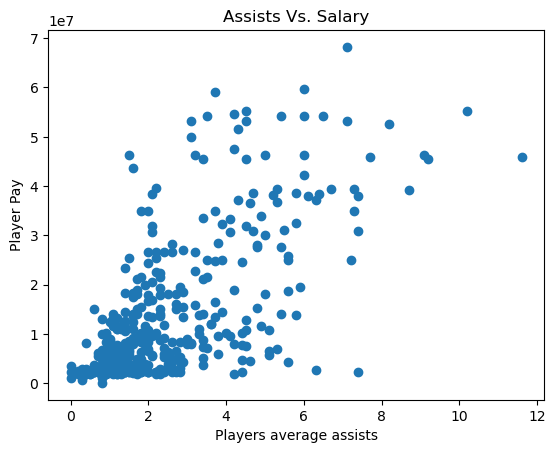

In [80]:
#scatterplot of assists vs salary
plt.scatter(x = 'AST', y = 'Salary', data = merged)
plt.xlabel("Players average assists")
plt.ylabel("Player Pay")
plt.title("Assists Vs. Salary")
plt.show()

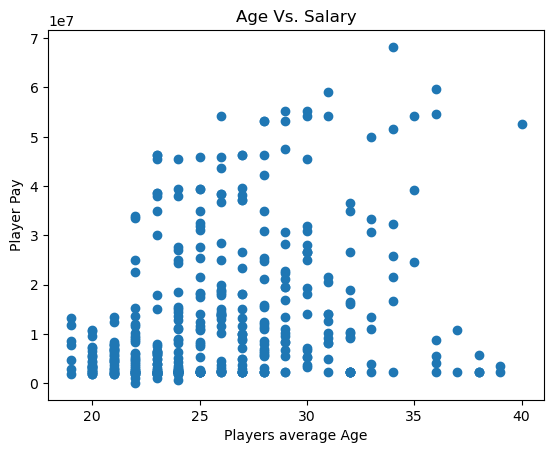

In [83]:
#scatterplot of age vs salary
plt.scatter(x = 'Age', y = 'Salary', data = merged)
plt.xlabel("Players average Age")
plt.ylabel("Player Pay")
plt.title("Age Vs. Salary")
plt.show()

Pos
PG    1.711779e+07
PF    1.458679e+07
SF    1.370850e+07
C     1.357017e+07
SG    1.107610e+07
Name: Salary, dtype: float64


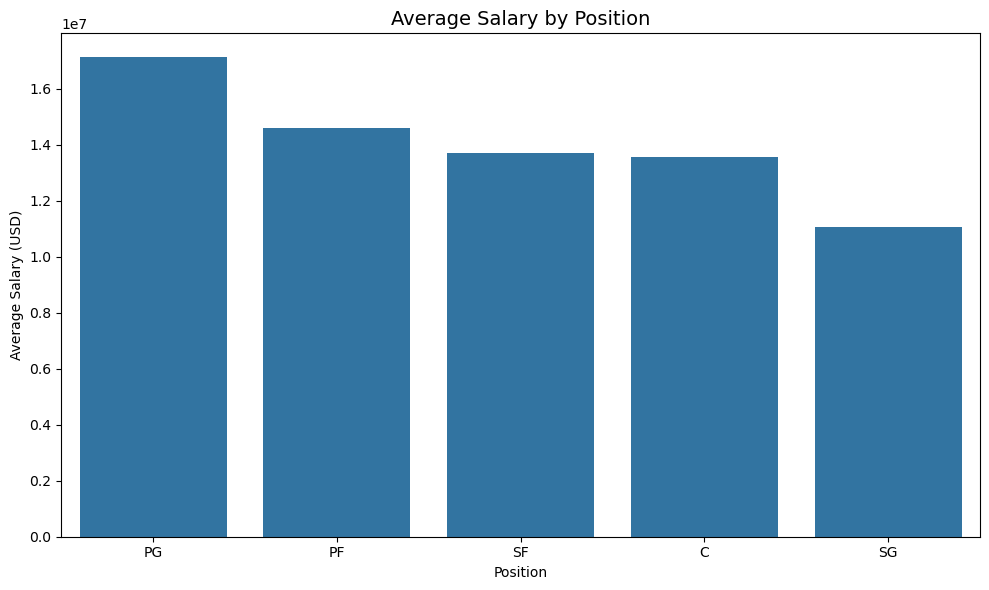

In [85]:
#plot of average salary by position to show the highest earning position
avg_salary = merged.groupby('Pos')['Salary'].mean().sort_values(ascending=False)
print(avg_salary)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary.index, y=avg_salary.values)
plt.title('Average Salary by Position', fontsize=14)
plt.ylabel('Average Salary (USD)')
plt.xlabel('Position')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Pos
PG    12.349275
SF    11.185294
SG    10.678846
PF    10.527500
C     10.192208
Name: PTS, dtype: float64


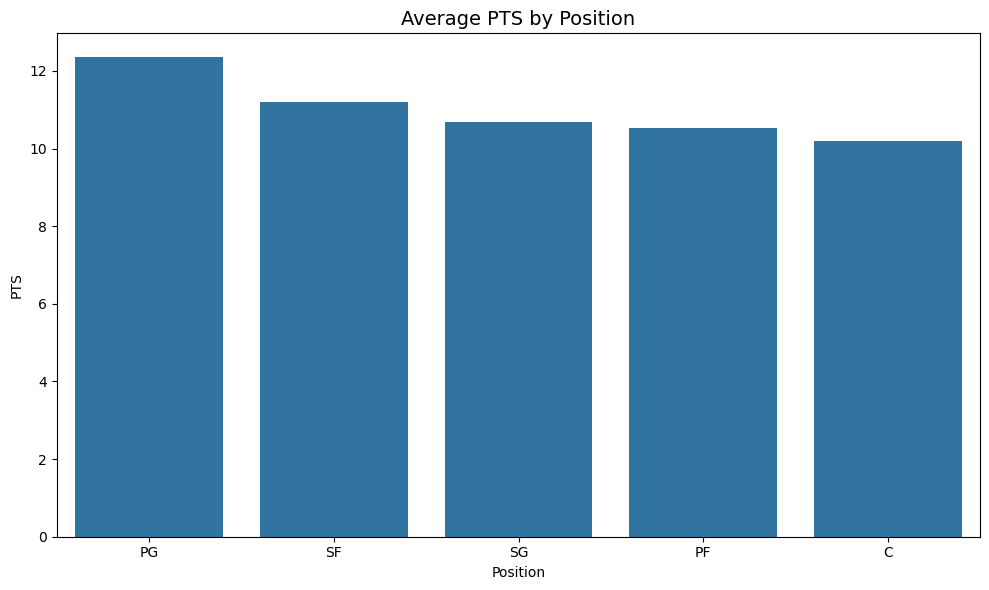

In [86]:
#plot of average points per position
avg_salary = merged.groupby('Pos')['PTS'].mean().sort_values(ascending=False)
print(avg_salary)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary.index, y=avg_salary.values)
plt.title('Average PTS by Position', fontsize=14)
plt.ylabel('PTS')
plt.xlabel('Position')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

R^2: 0.7
MAE: 6693209.67


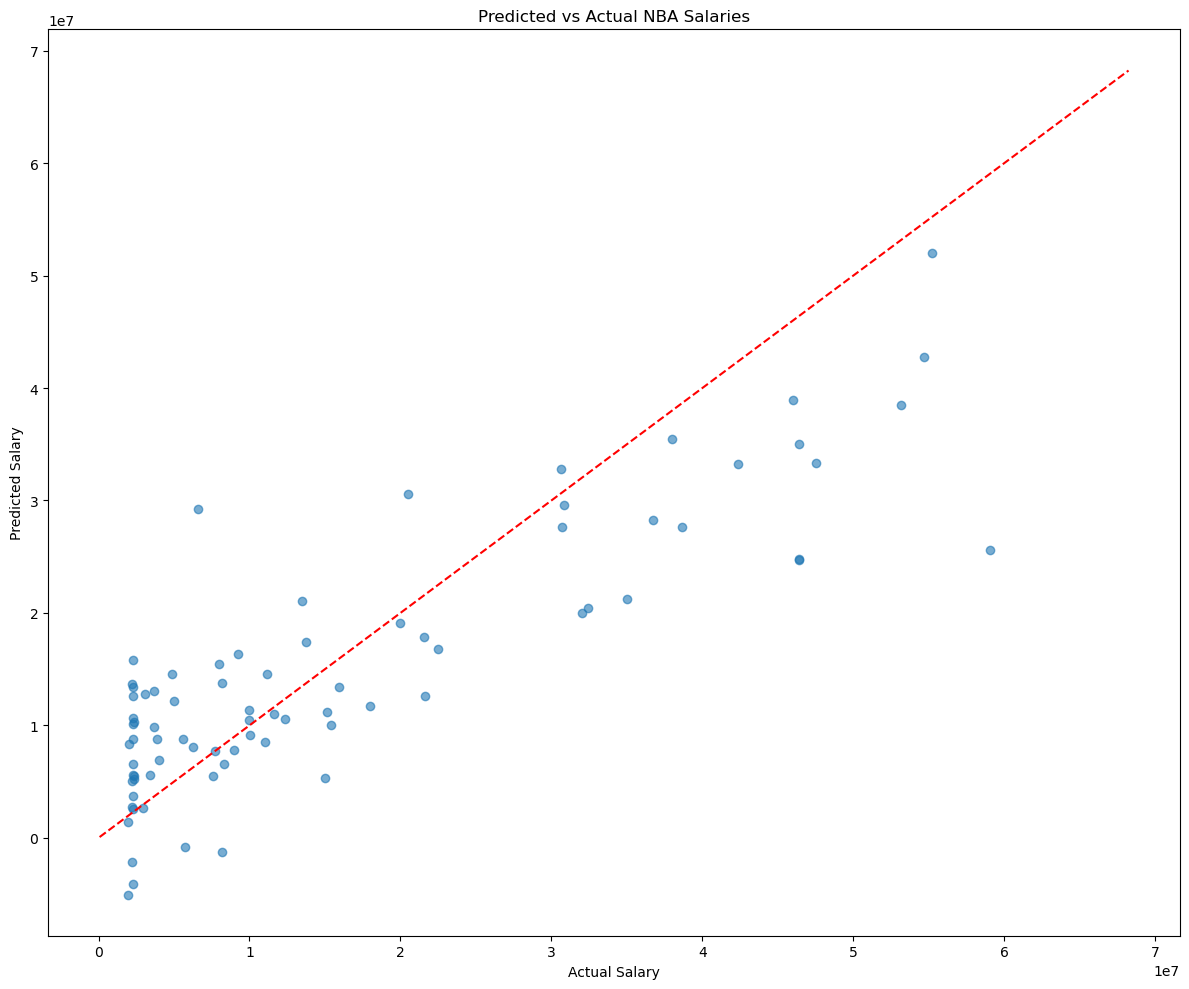

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
#predictive model guessing salary to their production
#feature set for salary prediction(box score and stats)
x_features = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'Age', 'TOV']

X = merged[x_features].fillna(0)
y = merged['Salary']
#test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
#linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)
#predict
y_hat = model.predict(X_test)


print("R^2:", round(r2_score(Y_test, y_hat), 2))
print("MAE:", round(mean_absolute_error(Y_test, y_hat), 3))

#showing the the predicted and actual salary in a scatterplot with an ideal line
plt.figure(figsize=(12,10))
plt.scatter(Y_test, y_hat, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual NBA Salaries")
plt.tight_layout()
plt.show()